In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import pandas as pd


In [3]:
def vdp_damped(t, y, mu, I):
    return [y[1] + I[t, 0], mu*(1-y[0]**2)*y[1]-y[0] + I[t, 1]]

def g_dW(x, scale=1):
    return scale

In [4]:
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/vdp_damped'

In [5]:
dt = 0.01 
# t_span = (0, 1000)
t_span = (0, 100)
t_eval = np.arange(t_span[0], t_span[1], dt)
T = len(t_eval)
N = 2

# mu = -0.06
mu = -0.9
I = np.zeros((len(t_eval), 2))
I[50:150] = np.random.randn(2)

x0 = np.random.randn(2)*0.01

dW = np.sqrt(dt) * np.random.randn(T,N)
# Define the function g(x)


# Initialize the x array
x = np.zeros((T, N))
x[0] = x0

# Simulate the stochastic differential equation
for t in range(1, T):
    x[t] = x[t-1] + np.array(vdp_damped(t, x[t-1], mu, I)) * dt + g_dW(x[t-1], scale=0.1) * dW[t]


In [6]:
start = 0
end = 3000
norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end][-1])
cmap = plt.get_cmap('rainbow')

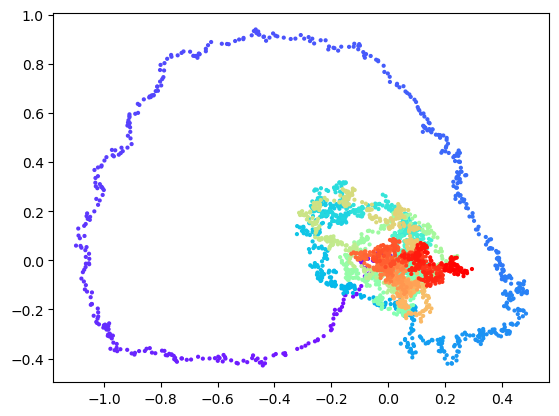

In [7]:

ax = plt.scatter(x[start:end, 0], x[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
# plt.colorbar(ax=ax)

In [8]:
num_saves = np.sum([f"{mu}" in fname for fname in os.listdir(save_dir)])
if num_saves > 0:
    pd.to_pickle(x, os.path.join(save_dir, f"{mu}_{num_saves}.pkl"))
else:
    pd.to_pickle(x, os.path.join(save_dir, f"{mu}.pkl"))


# Plot Trajectories

In [18]:
start = 0
end = 3000
norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end][-1])
cmap = plt.cm.get_cmap('RdYlBu_r')

In [19]:
mu1 = -0.9
mu2 = -0.06
traj1 = pd.read_pickle(os.path.join(save_dir, f"{mu1}.pkl"))
traj2 = pd.read_pickle(os.path.join(save_dir, f"{mu2}.pkl"))

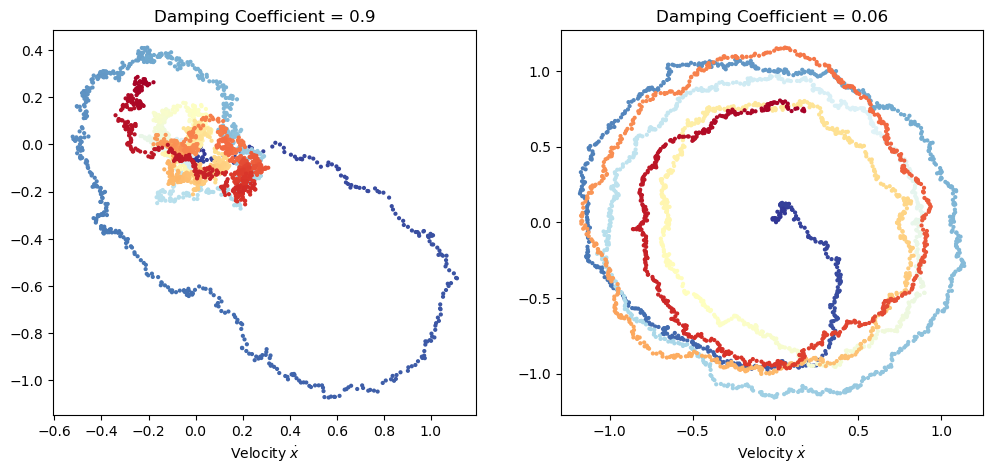

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ax = axs[0]
ax.scatter(traj1[start:end, 0], traj1[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
ax.set_xlabel('Position $x$')
ax.set_xlabel('Velocity $\dot{x}$')
ax.set_title(f'Damping Coefficient = {-mu1}')

ax = axs[1]
ax.scatter(traj2[start:end, 0], traj2[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
ax.set_xlabel('Position $x$')
ax.set_xlabel('Velocity $\dot{x}$')
ax.set_title(f'Damping Coefficient = {-mu2}')

# ax = axs[1]
# plt.colorbar(ax=ax)

plt.show()